# Analyse Exploratoire

### Import des modules

In [295]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

# Modélisation 

### Import des modules 

In [296]:
#Selection
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV, 
    cross_validate,
)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 
from sklearn.inspection import permutation_importance

#Preprocess
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

#Modèles
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor


### Feature Engineering

A réaliser : Enrichir le jeu de données actuel avec de nouvelles features issues de celles existantes. 

En règle générale : On utilise la méthode .apply() de Pandas pour créer une nouvelle colonne à partir d'une colonne existante. N'hésitez pas à regarder les exemples dans les chapitres de cours donnés en ressource

### Préparation des features pour la modélisation

A réaliser :
* Si ce n'est pas déjà fait, supprimer toutes les colonnes peu pertinentes pour la modélisation.
* Tracer la distribution de la cible pour vous familiariser avec l'ordre de grandeur. En cas d'outliers, mettez en place une démarche pour les supprimer.
* Débarrassez-vous des features redondantes en utilisant une matrice de corrélation de Pearson. Pour cela, utiisez la méthode corr() de Pandas, couplé d'un graphique Heatmap de la librairie Seaborn 
* Réalisez différents graphiques pour comprendre le lien entre vos features et la target (boxplots, scatterplots, pairplot si votre nombre de features numériques n'est pas très élevé).
*  Séparez votre jeu de données en un Pandas DataFrame X (ensemble de feautures) et Pandas Series y (votre target).
* Si vous avez des features catégorielles, il faut les encoder pour que votre modèle fonctionne. Les deux méthodes d'encodage à connaitre sont le OneHotEncoder et le LabelEncoder

In [297]:
import joblib

building_consumption = joblib.load("building.joblib")


In [298]:
# Voir le nombre de colonne non numérique

non_numeric_cols = building_consumption.select_dtypes(exclude=["number"]).columns

for col in non_numeric_cols:
    unique_count = building_consumption[col].nunique()
    print(f"{col} : {unique_count} valeur(s) unique(s)")


BuildingType : 5 valeur(s) unique(s)
PrimaryPropertyType : 21 valeur(s) unique(s)
Neighborhood : 19 valeur(s) unique(s)
LargestPropertyUseType : 55 valeur(s) unique(s)
SecondLargestPropertyUseType : 46 valeur(s) unique(s)
ThirdLargestPropertyUseType : 37 valeur(s) unique(s)
electricity : 2 valeur(s) unique(s)
natural_gas : 2 valeur(s) unique(s)
steam : 2 valeur(s) unique(s)


In [299]:
mapping = {
    'Office': 'Commercial',
    'Non-Refrigerated Warehouse': 'Industrial',
    'Refrigerated Warehouse': 'Industrial',
    'Distribution Center': 'Industrial',
    'Retail Store': 'Retail',
    'Supermarket/Grocery Store': 'Retail',
    'Restaurant': 'Retail',
    'Strip Mall': 'Retail',
    'Hotel': 'Lodging',
    'Residence Hall/Dormitory': 'Lodging',
    'Senior Care Community': 'Lodging',
    'College/University': 'Education',
    'K-12 School': 'Education',
    'Adult Education': 'Education',
    'Medical Office': 'Healthcare',
    'Hospital (General Medical & Surgical)': 'Healthcare',
    'Urgent Care/Clinic/Other Outpatient': 'Healthcare',
    'Other/Specialty Hospital': 'Healthcare',
    'Library': 'Public',
    'Worship Facility': 'Public',
    'Police Station': 'Public',
    'Courthouse': 'Public',
    'Fire Station': 'Public',
    'Prison/Incarceration': 'Public',
    'Social/Meeting Hall': 'Public',
    'Movie Theater': 'Entertainment',
    'Performing Arts': 'Entertainment',
    'Other - Entertainment/Public Assembly': 'Entertainment',
    'Fitness Center/Health Club/Gym': 'Recreation',
    'Other - Recreation': 'Recreation',
    'Manufacturing/Industrial Plant': 'Industrial',
    'Self-Storage Facility': 'Storage',
    'Parking': 'Infrastructure',
    'Bank Branch': 'Commercial',
    'Financial Office': 'Commercial',
    'Automobile Dealership': 'Commercial',
    'Repair Services (Vehicle, Shoe, Locksmith, etc)': 'Commercial',
    'Food Service': 'Retail',
    'Pre-school/Daycare': 'Education',
    'Lifestyle Center': 'Retail',
    'Data Center': 'Infrastructure',
    'Swimming Pool': 'Recreation',
    'Bar/Nightclub': 'Entertainment',
    'Food Sales': 'Retail',
    'Convenience Store without Gas Station': 'Retail',
    'Enclosed Mall': 'Retail',
    'Vocational School': 'Education',
    'Pre-school/Daycare': 'Education',
    'Other - Restaurant/Bar': 'Entertainment',
    'Other - Public Services': 'Public',
    'Other - Services': 'Service',
    'Other - Lodging/Residential': 'Lodging',
    'Social/Meeting Hall': 'Public',
    'Personal Services (Health/Beauty, Dry Cleaning, etc)': 'Service',
    'Gas Station with Convenience Store': 'Retail',
    'Ice Rink': 'Recreation',
    'Swimming Pool': 'Recreation',
    'Bar/Nightclub': 'Entertainment',
    'Food Service': 'Retail',
    'Convenience Store without Gas Station': 'Retail',
    'Fast Food Restaurant': 'Retail',
    'Pre-school/Daycare': 'Education',
    'Vocational School': 'Education',
    'Other - Restaurant/Bar': 'Entertainment',
    'Other - Entertainment/Public Assembly': 'Entertainment',
    'Other - Education': 'Education',
    'Other - Services': 'Service',
    'Other - Technology/Science': 'Service',
    'Other - Recreation': 'Recreation',
    'Other - Utility': 'Infrastructure',
    'Other/Specialty Hospital': 'Healthcare',
    'Social/Meeting Hall': 'Public',
    'Personal Services (Health/Beauty, Dry Cleaning, etc)': 'Service',
    'Self-Storage Facility': 'Storage',
    'Manufacturing/Industrial Plant': 'Industrial',
    'Strip Mall': 'Retail',
    'Other': 'Other',
}

# Création de la colonne avec le mapping pour regrouper

building_consumption['LargestPropertyCategory'] = building_consumption['LargestPropertyUseType'].map(mapping).fillna('Other')
building_consumption['SecondLargestPropertyCategory'] = building_consumption['SecondLargestPropertyUseType'].map(mapping).fillna('Other')
building_consumption['ThirdLargestPropertyCategory'] = building_consumption['ThirdLargestPropertyUseType'].map(mapping).fillna('Other')

# Supprimer les colonnes traités
building_consumption.drop(columns=['LargestPropertyUseType'], inplace=True)
building_consumption.drop(columns=['SecondLargestPropertyUseType'], inplace=True)
building_consumption.drop(columns=['ThirdLargestPropertyUseType'], inplace=True)

In [300]:
property_type_mapping = {
    'Small- and Mid-Sized Office': 'Office',
    'Large Office': 'Office',
    'Warehouse': 'Industrial',
    'Refrigerated Warehouse': 'Industrial',
    'Distribution Center': 'Industrial',
    'Retail Store': 'Retail',
    'Supermarket / Grocery Store': 'Retail',
    'Restaurant': 'Retail',
    'Hotel': 'Lodging',
    'Residence Hall': 'Lodging',
    'Senior Care Community': 'Lodging',
    'University': 'Education',
    'K-12 School': 'Education',
    'Medical Office': 'Healthcare',
    'Hospital': 'Healthcare',
    'Laboratory': 'Healthcare',
    'Self-Storage Facility': 'Storage',
    'Worship Facility': 'Public',
    'Mixed Use Property': 'Mixed',
    'Low-Rise Multifamily': 'Residential',
    'Other': 'Other'
}

building_consumption['PrimaryPropertyCategory'] = building_consumption['PrimaryPropertyType'].map(property_type_mapping).fillna('Other')

# Supprimer les colonnes traités
building_consumption.drop(columns=['PrimaryPropertyType'], inplace=True)

In [301]:
# Voir le nombre de colonne non numérique

non_numeric_cols = building_consumption.select_dtypes(exclude=["number"]).columns

for col in non_numeric_cols:
    unique_count = building_consumption[col].nunique()
    print(f"{col} : {unique_count} valeur(s) unique(s)")


BuildingType : 5 valeur(s) unique(s)
Neighborhood : 19 valeur(s) unique(s)
electricity : 2 valeur(s) unique(s)
natural_gas : 2 valeur(s) unique(s)
steam : 2 valeur(s) unique(s)
LargestPropertyCategory : 13 valeur(s) unique(s)
SecondLargestPropertyCategory : 13 valeur(s) unique(s)
ThirdLargestPropertyCategory : 12 valeur(s) unique(s)
PrimaryPropertyCategory : 11 valeur(s) unique(s)


In [302]:

# Conversion des colonnes non numérique

# Get Dummies pour Building Type (5 type)

building_consumption = pd.get_dummies(building_consumption, columns=['BuildingType'], drop_first=True)

# Get Dummies pour Neighborhood  (19 type)

building_consumption = pd.get_dummies(building_consumption, columns=['Neighborhood'], drop_first=True)


# Get Dummies pour LargestPropertyCategory, SecondLargestPropertyUseType, ThirdLargestPropertyUseType  (13 type)

building_consumption = pd.get_dummies(
    building_consumption,
    columns=[
        'LargestPropertyCategory',
        'SecondLargestPropertyCategory',
        'ThirdLargestPropertyCategory'
    ],
    drop_first=True
)

# Get Dummies pour PrimaryPropertyCategory  (11 type)
building_consumption = pd.get_dummies(building_consumption, columns=['PrimaryPropertyCategory'], drop_first=True)



In [303]:
X = building_consumption.drop(columns=["SiteEnergyUseWN(kBtu)", "TotalGHGEmissions"])
y = building_consumption.loc[X.index, "TotalGHGEmissions"]

In [304]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [305]:
from sklearn.model_selection import cross_validate

def evaluate_model(model_or_class, X, y, model_params=None, cv=5):
    if callable(model_or_class):
        model = model_or_class(**(model_params or {}))
    else:
        model = model_or_class

    scoring = {
        'r2': 'r2',
        'mae': 'neg_mean_absolute_error',
        'rmse': 'neg_root_mean_squared_error'
    }

    results = cross_validate(
        model,
        X,
        y,
        cv=cv,
        scoring=scoring,
        return_train_score=True
    )

    print(f"Model: {model.__class__.__name__}")
    print(f"→ R2 (train): {np.max(results['train_r2']):.3f} | R2 (test): {np.max(results['test_r2']):.3f}")
    print(f"→ MAE (train): {-np.min(results['train_mae']):,.2f} | MAE (test): {-np.min(results['test_mae']):,.2f}")
    print(f"→ RMSE (train): {-np.min(results['train_rmse']):,.2f} | RMSE (test): {-np.min(results['test_rmse']):,.2f}")



In [306]:

# Regresion Linéaire

model = LinearRegression()

scoring = {
    'r2': 'r2',
    'mae': 'neg_mean_absolute_error'
}

evaluate_model(model, X, y)


Model: LinearRegression
→ R2 (train): 0.720 | R2 (test): 0.599
→ MAE (train): 0.57 | MAE (test): 0.69
→ RMSE (train): 0.73 | RMSE (test): 0.93


In [307]:

# Random Forest Regressor

model = RandomForestRegressor(random_state=42)

params = {
    'n_estimators': 100,
    'max_depth': 3,
    'random_state': 42
}

scoring = {
    'r2': 'r2',
    'mae': 'neg_mean_absolute_error'
}

evaluate_model(model, X, y, params)


Model: RandomForestRegressor
→ R2 (train): 0.955 | R2 (test): 0.647
→ MAE (train): 0.22 | MAE (test): 0.66
→ RMSE (train): 0.29 | RMSE (test): 0.86


In [308]:

# Gradient Boosting Regressor

from sklearn.ensemble import GradientBoostingRegressor


model = GradientBoostingRegressor(random_state=42)


params = {
   'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

scoring = {
    'r2': 'r2',
    'mae': 'neg_mean_absolute_error'
}

evaluate_model(model, X, y, params)

Model: GradientBoostingRegressor
→ R2 (train): 0.821 | R2 (test): 0.670
→ MAE (train): 0.46 | MAE (test): 0.62
→ RMSE (train): 0.59 | RMSE (test): 0.82


### Optimisation et interprétation du modèle

A réaliser :
* Reprennez le meilleur algorithme que vous avez sécurisé via l'étape précédente, et réalisez une GridSearch de petite taille sur au moins 3 hyperparamètres.
* Si le meilleur modèle fait partie de la famille des modèles à arbres (RandomForest, GradientBoosting) alors utilisez la fonctionnalité feature importance pour identifier les features les plus impactantes sur la performance du modèle. Sinon, utilisez la méthode Permutation Importance de sklearn.

In [309]:
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

gbr = GradientBoostingRegressor(random_state=42)
grid = GridSearchCV(gbr, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)

# Résultat de la CV
print("Best R² (Train):", grid.best_score_)
print(grid.best_params_)

# Test meilleur params sur Test
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("R² (test):", r2_score(y_test, y_pred))
print("MAE (test):", mean_absolute_error(y_test, y_pred))
print("RMSE (test):", root_mean_squared_error(y_test, y_pred))


Best R² (Train): 0.691654868143457
{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
R² (test): 0.6950905471807609
MAE (test): 0.5748413916400542
RMSE (test): 0.7285235429833227


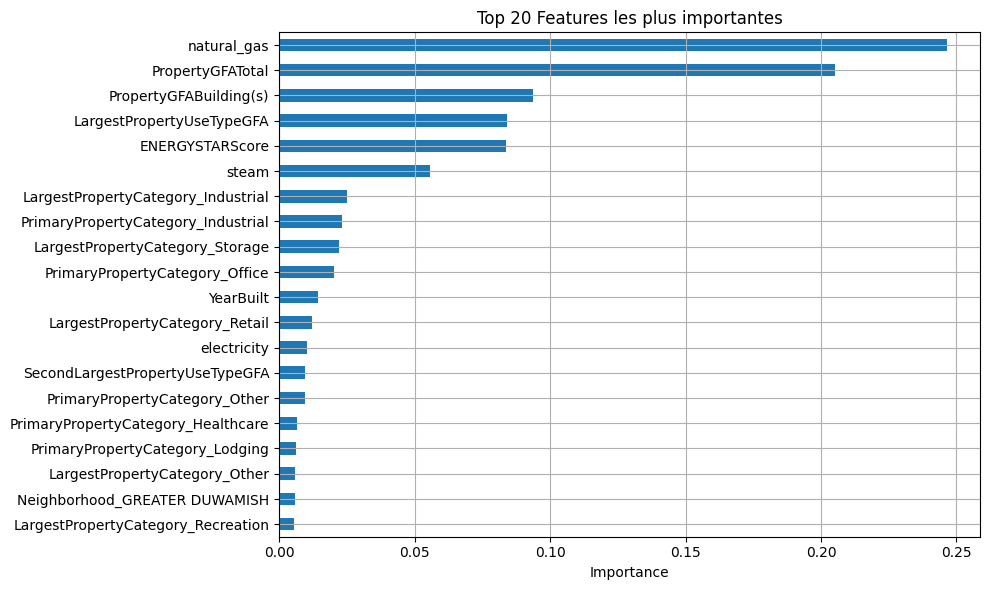

In [310]:
best_model = grid.best_estimator_

# Importance des variables
importances = best_model.feature_importances_
feature_names = X.columns
feature_importance = pd.Series(importances, index=feature_names)

# Top 20 des features
top_features = feature_importance.sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 6))
top_features.plot(kind='barh')
plt.title("Top 20 Features les plus importantes")
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()